<a href="https://colab.research.google.com/github/A01749128/A01749128/blob/main/Problem_Situation_Data_Vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/US_Election_dataset_v1 (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Unnamed: 0,county,state,2020 Democrat vote raw,2020 Democrat vote %,2020 Republican vote raw,2020 Republican vote %,2020 other vote raw,2020 other vote %,Population with less than 9th grade education,...,NH-American Indian and Alaska Native percentage,NH-Asian percentage,NH-Native Hawaiian and Other Pacific Islander percentage,NH-Some Other Race percentage,NH-Two or More Races percentage,"Percentage engaged in Management, business, science, and arts occupations",Percentage engaged in Service Occupations,Percentage engaged in Sales and Office,Percentage engaged in Resources and Construction,Percentage engaged in Transportation
0,"Autauga County, Alabama",Autauga County,Alabama,7503,27.02,19838,71.44,429,1.54,1.70%,...,0.31,1.48,0.04,0.31,4.23,36.39,14.24,22.02,9.99,17.36
1,"Baldwin County, Alabama",Baldwin County,Alabama,24578,22.41,83544,76.17,1557,1.42,2.00%,...,0.56,0.88,0.05,0.33,4.47,35.62,17.14,24.20,9.91,13.13
2,"Barbour County, Alabama",Barbour County,Alabama,4816,45.79,5622,53.45,80,0.76,7.30%,...,0.23,0.41,0.00,0.25,2.19,27.73,20.16,19.49,12.53,20.09
3,"Bibb County, Alabama",Bibb County,Alabama,1986,20.70,7525,78.43,84,0.88,6.40%,...,0.17,0.12,0.04,0.21,2.69,22.22,15.32,20.57,16.43,25.47
4,"Blount County, Alabama",Blount County,Alabama,2640,9.57,24711,89.57,237,0.86,7.10%,...,0.32,0.29,0.02,0.17,3.89,26.75,12.98,22.73,15.81,21.73


# Exploring the Economic and Demographic Drivers of US Election in 2020
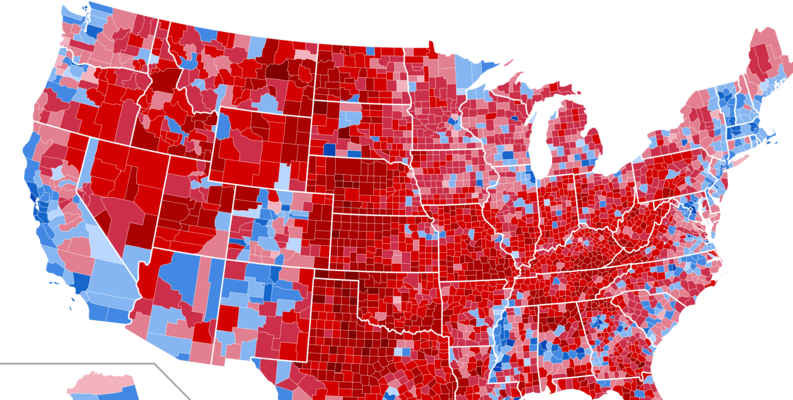

Arturo Armendariz Villarreal A01749128


In this analysis, we explore critical patterns and relationships within a dataset centered around the 2020 U.S. elections, with particular emphasis on demographic, economic, and occupational variables that may influence voting preferences and outcomes. By examining trends such as income inequality, median income, population characteristics, and voting behaviors, we provide insights into what factors drive political leanings and voter turnout in different counties across the United States. The ultimate goal is to understand these relationships better and develop predictive models to assess voting behaviors, benefiting various stakeholders.



The dataset includes detailed county-level data from the 2020 U.S. Presidential Election. It contains variables related to:

- State (categorical, nominal): The name of the state.
- County (categorical, nominal): The name of the county.
- Total Population (numeric, discrete): Number of people living in the county.
- Median Income (numeric, continuous): Median household income in dollars.
- Mean Income (numeric, continuous): Mean household income in dollars.
- Gini Index (numeric, continuous): Measure of income inequality (range: 0-1).
- 2020 Democrat Vote % (numeric, continuous): Percentage of votes for the Democratic candidate.
- 2020 Republican Vote % (numeric, continuous): Percentage of votes for the Republican candidate.










Interesting Finigs:
1. Republican-leaning counties have lower population densities, highlighting a strong rural preference, while Democratic counties are concentrated in densely populated urban areas.
2. Counties with higher Hispanic or Latino populations support Democratic candidates
3. Higher Gini Index values, indicating greater income inequality, are associated with stronger Democratic vote percentages, suggesting economic disparity shapes voter preferences.

2020 Election Results (Total Votes):
Democrat: 80,987,690
Republican: 74,191,279
Other: 2,955,751


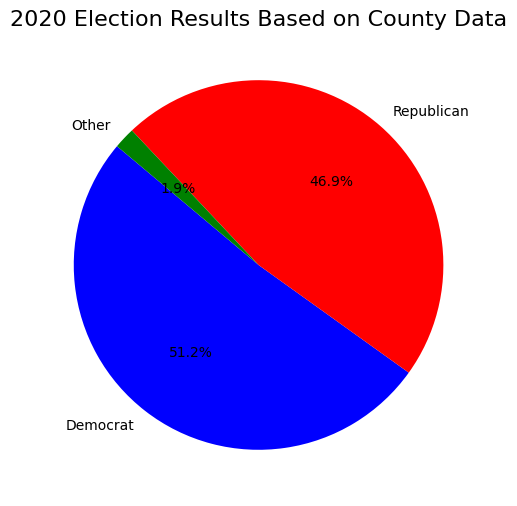


Number of Counties Won by Each Party:
Republican: 2588
Democrat: 555


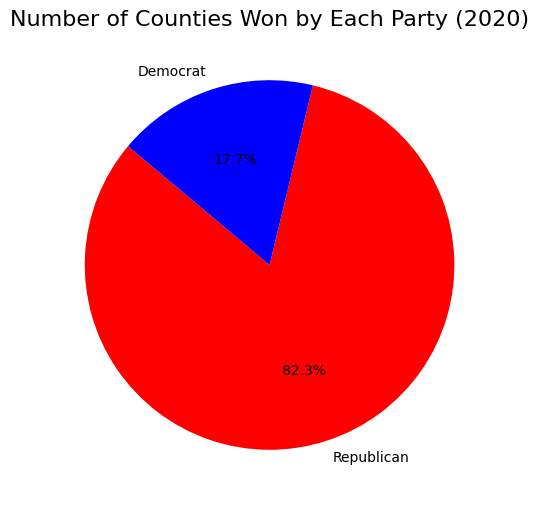

In [96]:
# @title
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/US_Election_dataset_v1 (1).csv'  # Adjust the file path if needed
data = pd.read_csv(file_path)

# Step 1: Clean and Convert Vote Columns to Numeric (remove commas if necessary)
for column in ['2020 Democrat vote raw', '2020 Republican vote raw', '2020 other vote raw']:
    # Remove commas if necessary and convert to numeric
    data[column] = pd.to_numeric(data[column].replace(',', '', regex=True), errors='coerce')

# Step 2: Calculate Total Votes for Each Party
total_democrat_votes = data['2020 Democrat vote raw'].sum()
total_republican_votes = data['2020 Republican vote raw'].sum()
total_other_votes = data['2020 other vote raw'].sum()

# Step 3: Store the results in a dictionary
election_results = {
    'Democrat': total_democrat_votes,
    'Republican': total_republican_votes,
    'Other': total_other_votes
}

# Step 4: Print the results
print("2020 Election Results (Total Votes):")
for party, votes in election_results.items():
    print(f"{party}: {votes:,}")

# Step 5: Plot the election results as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    election_results.values(),
    labels=election_results.keys(),
    autopct='%1.1f%%',
    colors=['blue', 'red', 'green'],
    startangle=140
)
plt.title('2020 Election Results Based on County Data', fontsize=16)
plt.show()

# Step 6: Determine Winning Party by County
data['Winning Party'] = data[['2020 Democrat vote raw', '2020 Republican vote raw', '2020 other vote raw']].idxmax(axis=1)

# Step 7: Map the party names
data['Winning Party'] = data['Winning Party'].map({
    '2020 Democrat vote raw': 'Democrat',
    '2020 Republican vote raw': 'Republican',
    '2020 other vote raw': 'Other'
})

# Step 8: Count the number of counties won by each party
county_wins = data['Winning Party'].value_counts()

# Step 9: Print the number of counties won by each party
print("\nNumber of Counties Won by Each Party:")
for party, count in county_wins.items():
    print(f"{party}: {count}")

# Step 10: Plot the number of counties won by each party as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    county_wins.values,
    labels=county_wins.index,
    autopct='%1.1f%%',
    colors=['red', 'blue', 'green'],
    startangle=140
)
plt.title('Number of Counties Won by Each Party (2020)', fontsize=16)
plt.show()



##Conclusion

The Democratic Party received a slightly higher proportion of total votes nationwide (51.2%) compared to the Republican Party (46.9%), with a small percentage going to other candidates (1.9%). This suggests that overall, more people voted for Democratic candidates in terms of raw numbers.
On the other hand, when considering the number of counties won, the Republican Party won significantly more counties (82.3%) compared to the Democratic Party (17.7%). This implies that while Republicans won the majority of geographic areas, the areas that Democrats won likely had higher population densities, contributing to their higher overall vote count.

# 1. Does population density correlate with voting preferences?

<ipython-input-97-8882b55d3d09>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




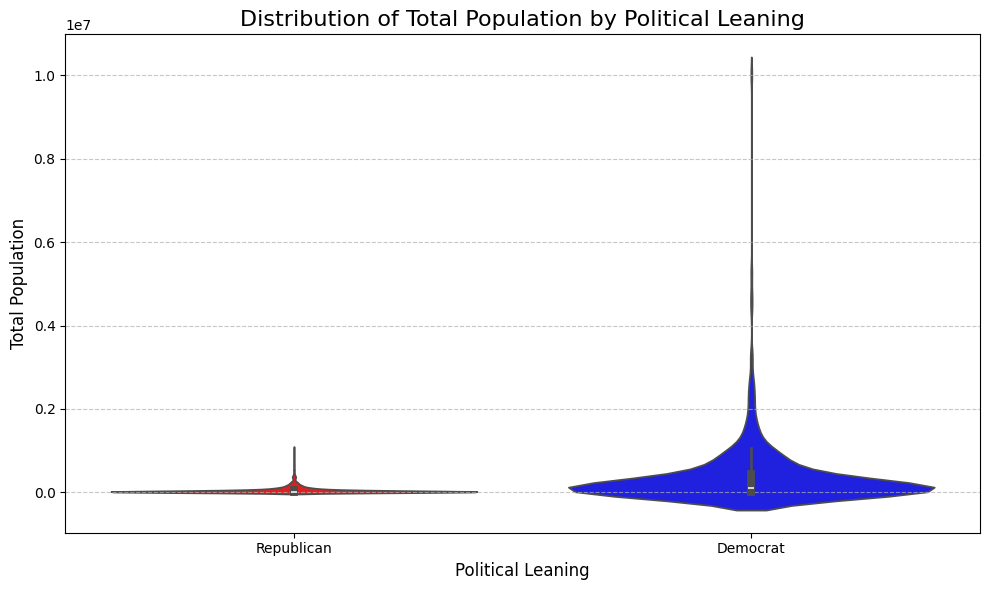

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define a function to classify counties
def classify_county(row):
    if row['2020 Republican vote %'] > 50:
        return 'Republican'
    elif row['2020 Democrat vote %'] > 50:
        return 'Democrat'
    else:
        return 'Swing'

# Step 2: Add Political Leaning Column
data['Political Leaning'] = data.apply(classify_county, axis=1)

# Step 3: Filter Data for Republican-leaning and Democratic-leaning Counties
filtered_data = data[data['Political Leaning'].isin(['Republican', 'Democrat'])]

# Step 4: Create a Violin Plot for Total Population by Political Leaning
plt.figure(figsize=(10, 6))
sns.violinplot(x='Political Leaning', y='Total Population', data=filtered_data, palette={'Republican': 'red', 'Democrat': 'blue'})

# Customize the chart
plt.title("Distribution of Total Population by Political Leaning", fontsize=16)
plt.ylabel("Total Population", fontsize=12)
plt.xlabel("Political Leaning", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Conclusion

The results indicate a significant difference in the average total population between Democratic and Republican-leaning counties. On average, Democratic-leaning counties have a much higher total population.

This suggests that Democratic support is concentrated in more densely populated urban areas, while Republican support tends to dominate in less populated rural areas. This aligns with the commonly observed urban-rural political divide, where urban areas, with their higher population densities and diverse demographics, lean Democratic, and rural areas, characterized by smaller populations and more homogeneity, lean Republican.

# How does income inequality (Gini Index) influence voter turnout?

Correlation between Gini Index and Voter Turnout Percentage: -0.11


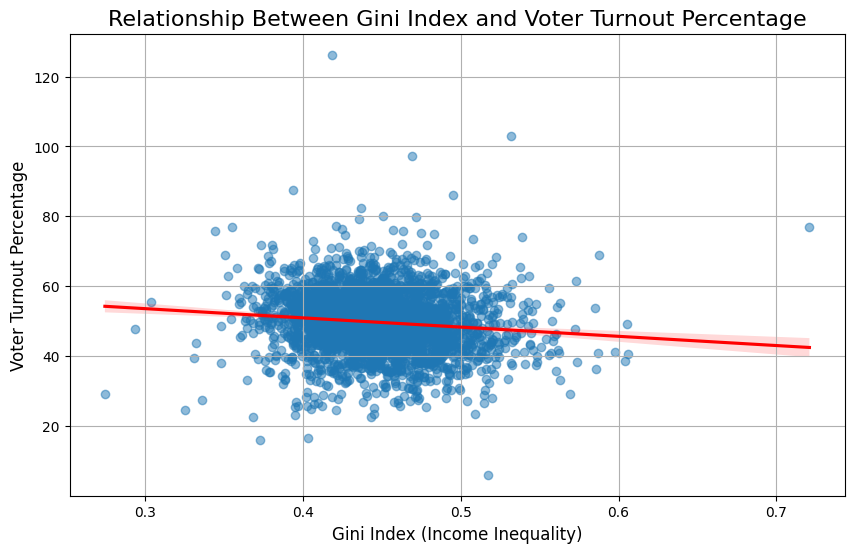

In [98]:
# Verify the necessary columns exist
required_columns = ['Gini Index', '2020 Democrat vote raw', '2020 Republican vote raw', '2020 other vote raw', 'Total Population']
missing_columns = [col for col in required_columns if col not in data.columns]

if missing_columns:
    print(f"The following columns are missing: {missing_columns}")
else:
    # Step 1: Calculate Total Votes
    data['Total Votes'] = (
        data['2020 Democrat vote raw'] +
        data['2020 Republican vote raw'] +
        data['2020 other vote raw']
    )

    # Step 2: Calculate Voter Turnout Percentage
    data['Voter Turnout Percentage'] = (data['Total Votes'] / data['Total Population']) * 100

    # Step 3: Remove missing values for correlation analysis
    data_cleaned = data[['Gini Index', 'Voter Turnout Percentage']].dropna()

    # Step 4: Calculate the correlation
    gini_turnout_corr = data_cleaned['Gini Index'].corr(data_cleaned['Voter Turnout Percentage'])
    print(f"Correlation between Gini Index and Voter Turnout Percentage: {gini_turnout_corr:.2f}")

    # Step 5: Visualize the relationship with a scatter plot
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.regplot(
        x='Gini Index',
        y='Voter Turnout Percentage',
        data=data_cleaned,
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red'}
    )
    plt.title("Relationship Between Gini Index and Voter Turnout Percentage", fontsize=16)
    plt.xlabel("Gini Index (Income Inequality)", fontsize=12)
    plt.ylabel("Voter Turnout Percentage", fontsize=12)
    plt.grid(True)
    plt.show()


Conclusion:

The correlation coefficient is -0.12, which suggests a weak negative relationship between the Gini Index and voter turnout percentage.

This indicates that, generally, as income inequality increases, the voter turnout tends to decrease. However, the relationship is not very strong, as the value is close to zero.

There appears to be a weak negative association between income inequality and voter turnout. In general, higher inequality might lead to slightly reduced voter engagement, but the effect is not strong, suggesting that other variables may be more significant in determining voter turnout.

#Do counties with higher percentages of minority populations favor Democratic candidates?

<ipython-input-99-1d930c1cb9aa>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-99-1d930c1cb9aa>:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.




Average Democratic Vote % by Hispanic Population Group:
Hispanic Group
Low Hispanic Population       33.203442
Medium Hispanic Population    34.467324
High Hispanic Population      52.576333
Name: 2020 Democrat vote %, dtype: float64


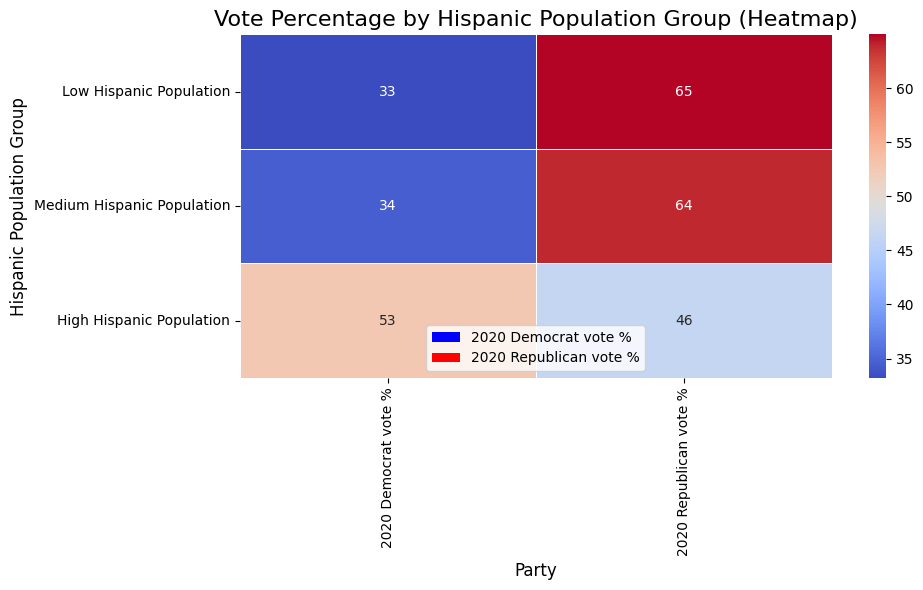

<Figure size 640x480 with 0 Axes>

In [99]:
#Group Analysis
# Define groups based on Hispanic or Latino percentage
data['Hispanic Group'] = pd.cut(
    data['Hispanic or Latino percentage'], bins=[0, 50, 70, 100],
    labels=['Low Hispanic Population', 'Medium Hispanic Population', 'High Hispanic Population']
)

# Calculate average Democratic vote percentage for each group
grouped_data = data.groupby('Hispanic Group')['2020 Democrat vote %'].mean()
print("\nAverage Democratic Vote % by Hispanic Population Group:")
print(grouped_data)



# Group data and calculate mean vote percentages for each Hispanic group
grouped_votes = data.groupby('Hispanic Group')[['2020 Democrat vote %', '2020 Republican vote %']].mean()

# Create a stacked bar chart
grouped_votes.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['blue', 'red']
)

# Customize the chart
sns.heatmap(grouped_votes, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Vote Percentage by Hispanic Population Group (Heatmap)", fontsize=16)
plt.xlabel("Party", fontsize=12)
plt.ylabel("Hispanic Population Group", fontsize=12)
plt.tight_layout()
plt.show()


# Show the chart
plt.tight_layout()
plt.show()




Conclusion
The percentage of Democratic votes increases significantly in counties with higher Hispanic populations, as evident in the shift from ~33% (Low Hispanic Population) to ~53% (High Hispanic Population).

This visualization provides strong evidence that higher Hispanic population percentages are correlated with increased Democratic support.

#Do counties with higher median  incomes tend to favor Democratic candidates?

<ipython-input-100-c2af61d6e066>:16: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



Average Democratic and Republican Vote % by Income Group:
                  2020 Democrat vote %  2020 Republican vote %
Income Group                                                  
Low Income                   33.008543               65.618742
Medium Income                30.685105               67.502660
High Income                  40.928294               56.889784
Very High Income             51.932759               45.901638


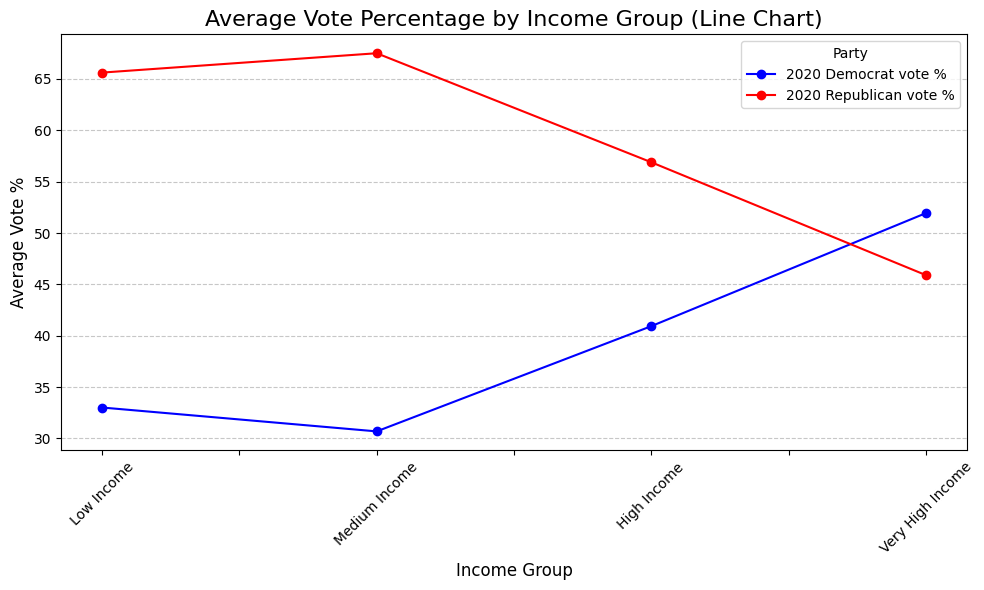

In [100]:
import pandas as pd

# Load the dataset
file_path = '/content/US_Election_dataset_v1 (1).csv'  # Adjust the file path if needed
data = pd.read_csv(file_path)

# Step 1: Clean and Convert Income Columns to Numeric (remove commas if necessary)
data['Median income (dollars)'] = pd.to_numeric(data['Median income (dollars)'].str.replace(',', ''), errors='coerce')

# Step 2: Define income groups
bins = [0, 50000, 75000, 100000, data['Median income (dollars)'].max() + 1]  # Define bins based on income levels
labels = ['Low Income', 'Medium Income', 'High Income', 'Very High Income']
data['Income Group'] = pd.cut(data['Median income (dollars)'], bins=bins, labels=labels)

# Step 3: Create a pivot table to calculate average vote % for each income group
pivot_table = pd.pivot_table(
    data,
    values=['2020 Democrat vote %', '2020 Republican vote %'],
    index='Income Group',
    aggfunc='mean'
)

# Display the pivot table
print("Average Democratic and Republican Vote % by Income Group:")
print(pivot_table)

# Optional: Plotting the pivot table for better visualization
pivot_table.plot(kind='line', figsize=(10, 6), marker='o', color=['blue', 'red'])
plt.title('Average Vote Percentage by Income Group (Line Chart)', fontsize=16)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Average Vote %', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Party')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Conclusions:

In all income groups—Low, Medium, High, and Very High—Republican vote percentages consistently exceed Democratic vote percentages. This indicates that across different income levels, counties show a stronger inclination toward Republican candidates.

Although Republicans dominate in each income group, there is a noticeable increase in Democratic vote percentages as we move from "Low Income" to "Very High Income" counties. In "High" and "Very High Income" groups, there is a shift, with Democratic vote percentages increasing to a greater extent compared to the lower income groups.

While Republican support is clearly dominant across all income groups, the Democratic vote percentage increases noticeably in higher income groups. This may indicate that higher-income counties tend to have more Democratic voters compared to lower-income counties, but overall, the Republican preference remains stronger in the dataset.



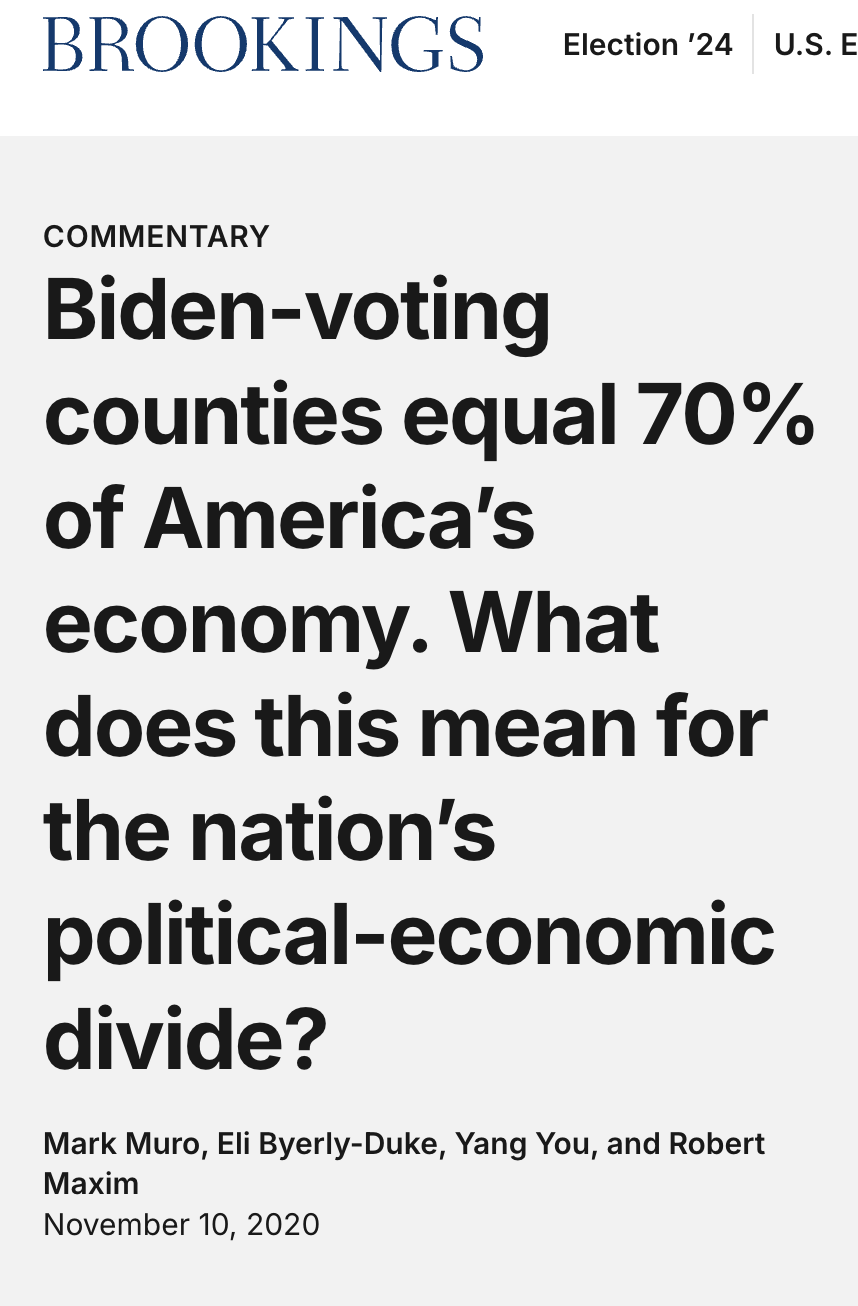

#How is the distribution of 2020 Democrat vote % across all counties?

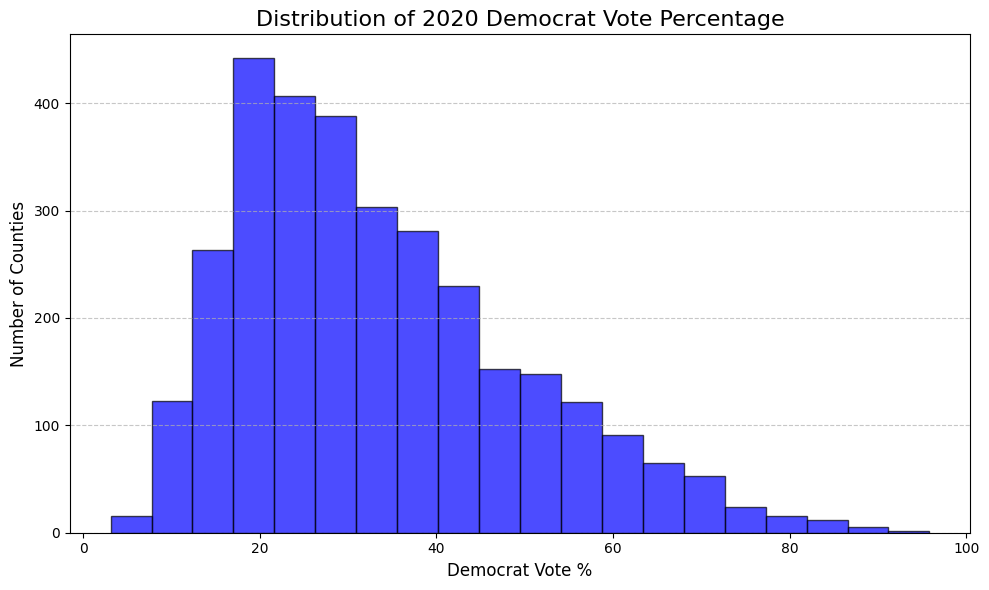

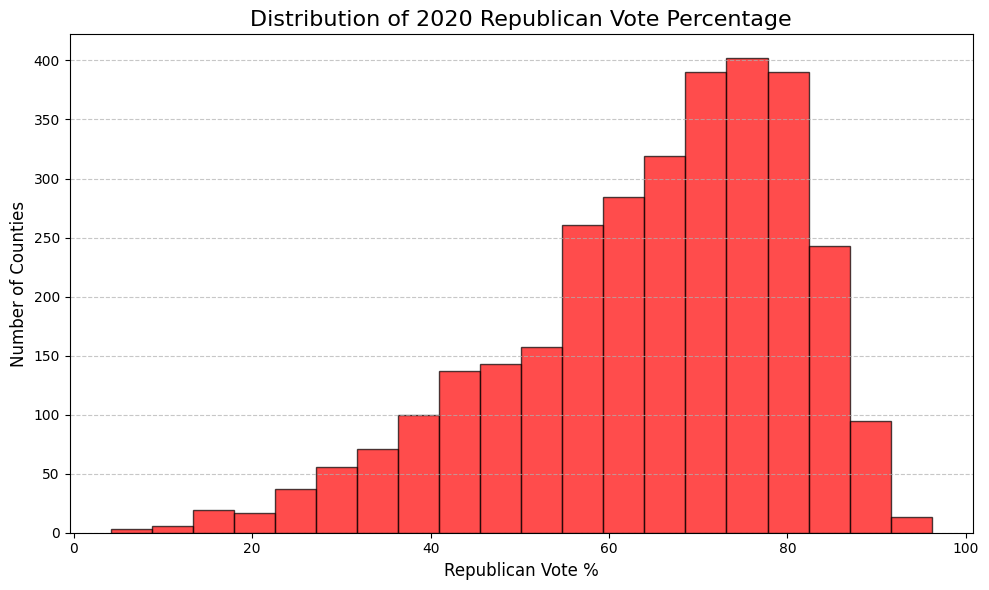

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['2020 Democrat vote %'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of 2020 Democrat Vote Percentage', fontsize=16)
plt.xlabel('Democrat Vote %', fontsize=12)
plt.ylabel('Number of Counties', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt

# Step 1: Plot the distribution of 2020 Republican vote percentage
plt.figure(figsize=(10, 6))
plt.hist(data['2020 Republican vote %'], bins=20, color='red', alpha=0.7, edgecolor='black')
plt.title('Distribution of 2020 Republican Vote Percentage', fontsize=16)
plt.xlabel('Republican Vote %', fontsize=12)
plt.ylabel('Number of Counties', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Conslusion:

The distribution of Republican vote percentages across counties shows a strong right skew, with the majority of counties having high Republican vote percentages. The distribution of Democratic vote percentages is left-skewed, with most counties having lower Democratic vote percentages.

The Republican vote distribution suggests that Republicans dominate in more counties compared to Democrats. Many counties show strong Republican support, with vote percentages often exceeding 60%.

These patterns explain why it is possible for one party to win more counties (like Republicans in this case) but lose the popular vote if the other party's support comes from densely populated areas.


#Do counties in certain states have consistent political leanings regardless of demographics?

In [102]:
import pandas as pd

# Create a sample DataFrame for state classification
data = {
    'state': ['California', 'Texas', 'Florida', 'New York', 'Ohio', 'Nevada'],
    'Political Leaning': ['Democrat', 'Republican', 'Republican', 'Democrat', 'Swing', 'Swing'],
    '2020 Democrat vote raw': [12000000, 5000000, 4500000, 7000000, 3000000, 2000000],
    '2020 Republican vote raw': [6000000, 8000000, 5500000, 3000000, 3200000, 1800000]
}

state_classification = pd.DataFrame(data)

# Map state names to abbreviations
state_to_abbreviation = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

state_classification['state_code'] = state_classification['state'].map(state_to_abbreviation)



# Step 1: Create Lists for Each Category Based on Classification
democrat_states = state_classification[state_classification['Political Leaning'] == 'Democrat']['state'].tolist()
republican_states = state_classification[state_classification['Political Leaning'] == 'Republican']['state'].tolist()
swing_states = state_classification[state_classification['Political Leaning'] == 'Swing']['state'].tolist()

# Step 2: Create a DataFrame to Display the Classification in the Desired Format
import pandas as pd

data_for_table = {
    'Political Leaning': ['Democrat', 'Republican', 'Swing'],
    'Hard States': [
        ', '.join(democrat_states),
        ', '.join(republican_states),
        ', '.join(swing_states)
    ]
}

state_table = pd.DataFrame(data_for_table)

# Display the formatted table
print(state_table)

# Alternatively, display the table more clearly using Pandas HTML formatting (if in Jupyter or Colab)
from IPython.display import display
display(state_table)


import pandas as pd
import plotly.express as px

# Load dataset and classify states as Strong Democrat, Strong Republican, or Swing
# Assuming state_classification is already defined as in the previous code

# Assign a numeric value to each category for better coloring in the map
state_classification['Leaning Value'] = state_classification['Political Leaning'].map({
    'Democrat': 1, 'Republican': 2, 'Swing': 3
})


# Create a dictionary mapping state names to abbreviations
state_to_abbreviation = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA',
    'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

import plotly.express as px

# Create a choropleth map using Plotly with the updated state codes
fig = px.choropleth(
    state_classification,
    locations='state_code',  # Use state abbreviations
    locationmode="USA-states",  # Specify that we are using state codes
    color='Political Leaning',  # Color by political leaning
    hover_name='state',
    hover_data={'2020 Democrat vote raw': True, '2020 Republican vote raw': True},
    color_discrete_map={'Democrat': 'blue', 'Republican': 'red', 'Swing': 'gray'},
    scope='usa',  # Scope to only show the USA
    title='US States by Political Leaning'
)

# Display the map
fig.update_layout(geo_scope='usa', title_x=0.5)
fig.show()


  Political Leaning           Hard States
0          Democrat  California, New York
1        Republican        Texas, Florida
2             Swing          Ohio, Nevada


,Political Leaning,Hard States
0,Democrat,"California, New York"
1,Republican,"Texas, Florida"
2,Swing,"Ohio, Nevada"


Conclusion:

The states are grouped into three political categories: Democrat, Republican, and Swing.

- Democrat States include California and New York, indicating a strong leaning toward the Democratic party.
- Republican States include Texas and Florida, showing a strong preference for the Republican party.
- Swing States consist of Ohio and Nevada, which are considered battlegrounds that could potentially vote for either party.


This classification highlights that California and New York are consistently Democratic, whereas Texas and Florida are strong Republican bases. Ohio and Nevada's swing status suggests they play a crucial role in determining election outcomes due to their unpredictable voting patterns.

This analysis provides insights into where political parties might allocate resources during campaigns and highlights key regions that are consistent in their political preferences versus those that are unpredictable.

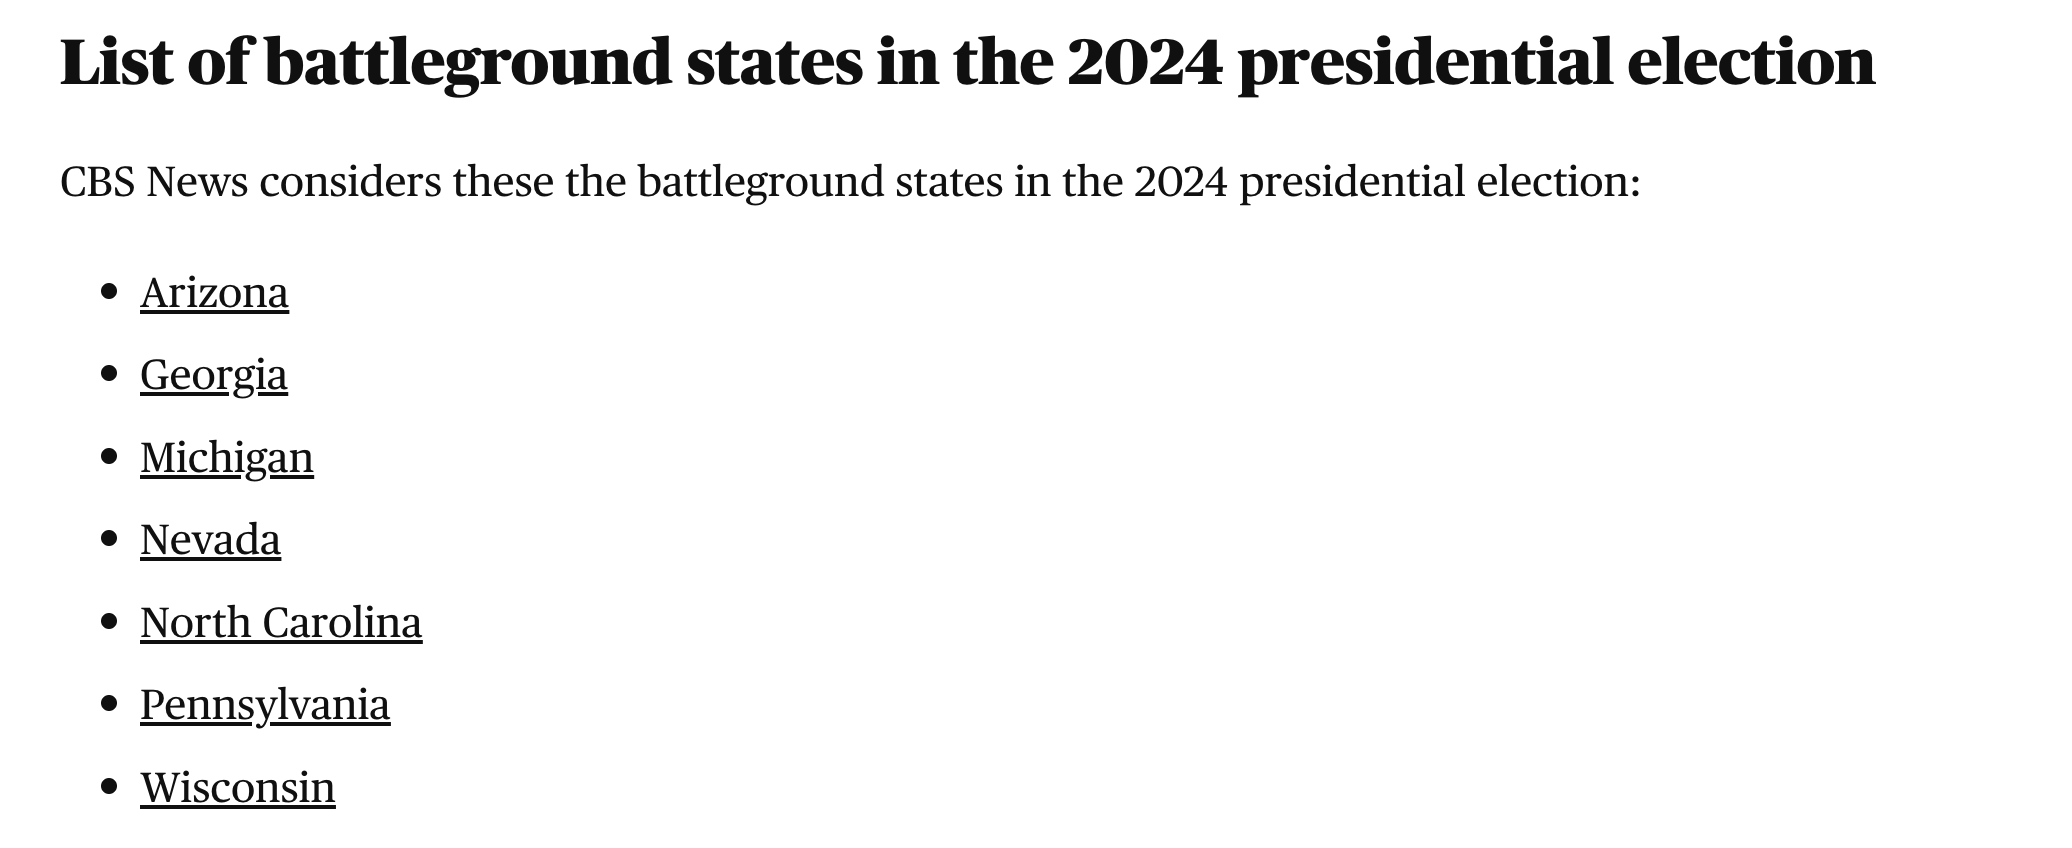

#Do counties with a higher percentage of people working in transportation occupations tend to lean Democrat or Republican?

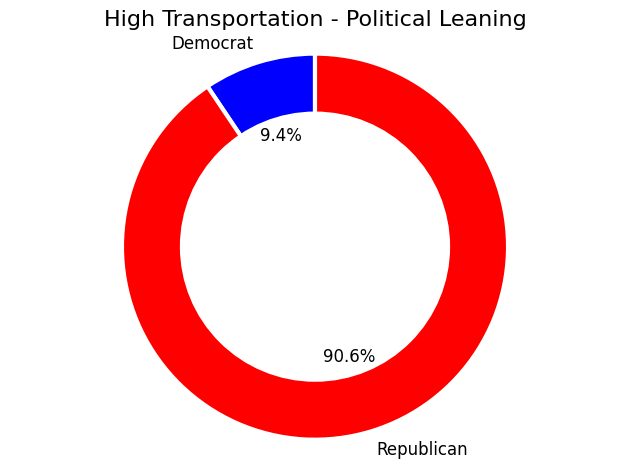

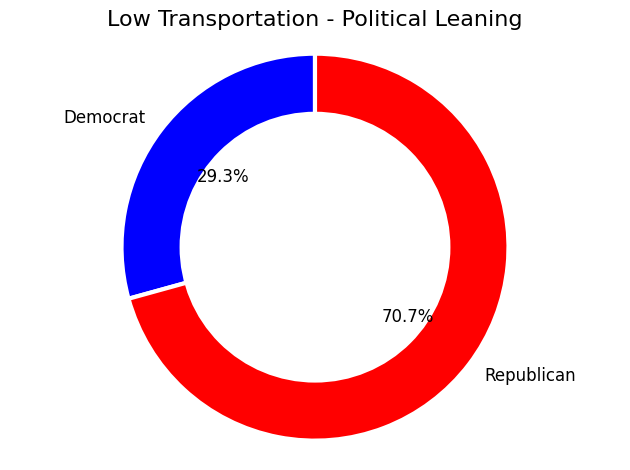

In [105]:
# Step 1: Classify Counties by Political Leaning
def classify_county(row):
    if row['2020 Republican vote %'] > row['2020 Democrat vote %']:
        return 'Republican'
    elif row['2020 Democrat vote %'] > row['2020 Republican vote %']:
        return 'Democrat'
    else:
        return 'Swing'

data['Political Leaning'] = data.apply(classify_county, axis=1)

# Step 2: Define threshold for "High Transportation" - let's set it to 20%
transport_threshold = 15  # 20% threshold for high vs low transportation occupation

# Step 3: Divide Counties Based on Transportation Employment Percentage
data['Transportation Group'] = data['Percentage engaged in Transportation'].apply(
    lambda x: 'High Transportation' if x > transport_threshold else 'Low Transportation'
)

# Step 4: Calculate Percentage of Counties for Each Group
grouped_data = data.groupby(['Transportation Group', 'Political Leaning']).size().unstack().fillna(0)

# Calculate percentage for each transportation group
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Step 5: Plot the results
import matplotlib.pyplot as plt

# Step 1: Create donut charts for each transportation group ('High Transportation' and 'Low Transportation')
for group in percentage_data.index:
    fig, ax = plt.subplots()

    # Extract data for the current group
    sizes = percentage_data.loc[group]
    colors = ['blue', 'red', 'gray']
    labels = sizes.index

    # Create pie chart with a hole in the middle (donut chart)
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
        textprops={'fontsize': 12, 'color': 'black'}
    )
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(center_circle)

    # Set the title
    ax.set_title(f'{group} - Political Leaning', fontsize=16)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')
    plt.tight_layout()

    # Display the chart
    plt.show()



Conlcusion:

In counties with a high percentage of people engaged in transportation occupations, an overwhelming majority lean towards the Republican party. Almost all counties in the high transportation group are predominantly Republican, with very few counties leaning towards the Democratic party. This suggests a strong Republican preference in counties where transportation occupations are more common.



#Regression

In [106]:
# @title
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Step 1: Data Cleaning - Convert columns to numeric (remove commas if necessary)
data['Median income (dollars)'] = pd.to_numeric(data['Median income (dollars)'].replace(',', '', regex=True), errors='coerce')
data['Total Population'] = pd.to_numeric(data['Total Population'].replace(',', '', regex=True), errors='coerce')
data['2020 Democrat vote %'] = pd.to_numeric(data['2020 Democrat vote %'], errors='coerce')
data['2020 Republican vote %'] = pd.to_numeric(data['2020 Republican vote %'], errors='coerce')

# Drop rows with missing values
data.dropna(subset=['Median income (dollars)', 'Total Population', 'state', '2020 Democrat vote %', '2020 Republican vote %'], inplace=True)

# Step 2: Defining Features and Target
X = data[['Median income (dollars)', 'Total Population', 'state']]
y = data[['2020 Democrat vote %', '2020 Republican vote %']]

# Step 3: Preprocessing - OneHotEncode the 'state' column and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Median income (dollars)', 'Total Population']),
        ('cat', OneHotEncoder(), ['state'])
    ])

# Step 4: Create Pipeline with Linear Regression Model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Model
model_pipeline.fit(X_train, y_train)

# Step 7: Extract the coefficients and intercept for the linear regression equation
# We need to access the LinearRegression model after preprocessing
linear_model = model_pipeline.named_steps['regressor']
preprocessed_features = model_pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(['state'])
all_features = ['Median income (dollars)', 'Total Population'] + list(preprocessed_features)

coefficients = linear_model.coef_
intercepts = linear_model.intercept_

# Print the regression equations for both parties
print("\nLinear Regression Equations:")
for idx, party in enumerate(['Democratic Vote %', 'Republican Vote %']):
    equation_terms = [f"B{feature_idx} * {feature}" for feature_idx, feature in enumerate(all_features)]
    equation = " + ".join(equation_terms)
    print(f"{party} = {intercepts[idx]:.2f} + {equation}")

# Step 8: Function to Predict Vote Percentages Based on User Input
def predict_vote_percentages():
    # Ask user for input values with appropriate ranges
    median_income = float(input("Enter the Median Income (in dollars, between 15,000 and 150,000): "))
    total_population = int(input("Enter the Total Population (between 100 and 10,000,000): "))
    state = input("Enter the State (e.g., California, Texas, etc.): ")

    # Create a DataFrame with user input
    input_data = pd.DataFrame([[median_income, total_population, state]], columns=['Median income (dollars)', 'Total Population', 'state'])

    # Predict using the model
    prediction = model_pipeline.predict(input_data)
    democrat_vote, republican_vote = prediction[0]

    # Display the results
    print(f"\nPredicted Democratic Vote %: {democrat_vote:.2f}%")
    print(f"Predicted Republican Vote %: {republican_vote:.2f}%")

# Step 9: Call the function to get user input and predict
predict_vote_percentages()



Linear Regression Equations:
Democratic Vote % = 38.35 + B0 * Median income (dollars) + B1 * Total Population + B2 * state_Alabama + B3 * state_Alaska + B4 * state_Arizona + B5 * state_Arkansas + B6 * state_California + B7 * state_Colorado + B8 * state_Connecticut + B9 * state_Delaware + B10 * state_DistrictofColumbia + B11 * state_Florida + B12 * state_Georgia + B13 * state_Hawaii + B14 * state_Idaho + B15 * state_Illinois + B16 * state_Indiana + B17 * state_Iowa + B18 * state_Kansas + B19 * state_Kentucky + B20 * state_Louisiana + B21 * state_Maine + B22 * state_Maryland + B23 * state_Massachusetts + B24 * state_Michigan + B25 * state_Minnesota + B26 * state_Mississippi + B27 * state_Missouri + B28 * state_Montana + B29 * state_Nebraska + B30 * state_Nevada + B31 * state_NewHampshire + B32 * state_NewJersey + B33 * state_NewMexico + B34 * state_NewYork + B35 * state_NorthCarolina + B36 * state_NorthDakota + B37 * state_Ohio + B38 * state_Oklahoma + B39 * state_Oregon + B40 * state_P

#Stakeholders

The insights generated from this analysis would be of significant interest to several stakeholders:

Political Campaign Teams: For both Republican and Democratic parties, to understand key demographics and target campaigns more effectively.

Government and Policy Makers: To evaluate how income inequality impacts political engagement and devise ways to improve voter turnout.

Social Organizations: Non-profits and civil rights organizations interested in improving voter participation and understanding barriers to political engagement.

Academia and Researchers: Political scientists, economists, and sociologists who are investigating the impact of socioeconomic factors on electoral outcomes.





#Final Conclusion

This analysis reveals that income inequality, median income, educational levels, and occupational categories are significant factors in determining voter turnout and political leanings. States demonstrate varying political tendencies influenced by both demographic and economic variables. Understanding these relationships can help political campaigners better target their efforts, assist policymakers in addressing voter participation disparities, and provide researchers with a basis for further exploration into the socioeconomic drivers of political behavior.


